In [1]:
import numpy as np
p1 = np.array([0.2,0.4,0.4])
P = np.array([[0.8,0.1,0.1],[0.5,0.1,0.4],[0.5,0.3,0.2]])
for i in range(10):
    p2 = np.dot(p1,P)
    p1 = p2
    print(p1)

[0.56 0.18 0.26]
[0.668 0.152 0.18 ]
[0.7004 0.136  0.1636]
[0.71012 0.13272 0.15716]
[0.713036 0.131432 0.155532]
[0.7139108 0.1311064 0.1549828]
[0.71417324 0.13099656 0.1548302 ]
[0.71425197 0.13096604 0.15478199]
[0.71427559 0.1309564  0.15476801]
[0.71428268 0.1309536  0.15476372]


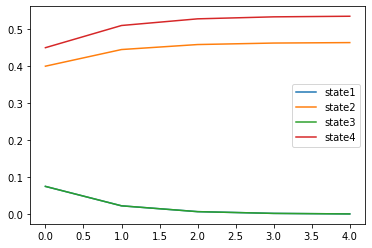

In [2]:
import matplotlib.pyplot as plt

P_0 = [0.25,0.25,0.25,0.25]

P = [[0.3,0.3,0,0.4],
     [0,1,0,0],
     [0,0.3,0.3,0.4],
     [0,0,0,1]]

state1 = []
state2 = []
state3 = []
state4 = []

for i in range(5):
    P_0 = np.dot(P_0,P)
    # P_0  = P_0/sum(P_0)
    state1.append(P_0[0])
    state2.append(P_0[1])
    state3.append(P_0[2])
    state4.append(P_0[3])

plt.plot(state1,label = 'state1')
plt.plot(state2,label = 'state2')
plt.plot(state3,label = 'state3')
plt.plot(state4,label = 'state4')
plt.legend()

In [3]:
#先 import 用到的库。
import numpy as np
import random as rm


# 状态空间
states = ["Sleep","Icecream","Run"]

# 可能的事件序列
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# 概率矩阵（转移矩阵）
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

#要保证概率之和（行之和）是 1
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay! ")

#我们要用 numpy.random.choice 从可能的转移集合选出随机样本。
# 实现了可以预测状态的马尔可夫模型的函数。
def activity_forecast(days):
    # 选择初始状态
    activityToday = "Sleep"
    print("Start state: " + activityToday)
    # 应该记录选择的状态序列。这里现在只有初始状态。
    activityList = [activityToday]
    i = 0
    # 计算 activityList 的概率
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1  
    print("Possible states: " + str(activityList))
    print("End state after "+ str(days) + " days: " + activityToday)
    print("Probability of the possible sequence of states: " + str(prob))

# 预测 2 天后的可能状态
activity_forecast(2)

All is gonna be okay! 
Start state: Sleep
Possible states: ['Sleep', 'Run', 'Run']
End state after 2 days: Run
Probability of the possible sequence of states: 0.3


In [4]:
#先 import 用到的库。
import numpy as np
import random as rm


# 状态空间
states = ["Sleep","Icecream","Run"]

# 可能的事件序列
transitionName = [["SS","SR","SI"],["RS","RR","RI"],["IS","IR","II"]]

# 概率矩阵（转移矩阵）
transitionMatrix = [[0.2,0.6,0.2],[0.1,0.6,0.3],[0.2,0.7,0.1]]

#要保证概率之和（行之和）是 1
if sum(transitionMatrix[0])+sum(transitionMatrix[1])+sum(transitionMatrix[2]) != 3:
    print("Somewhere, something went wrong. Transition matrix, perhaps?")
else: print("All is gonna be okay! ")

#我们要用 numpy.random.choice 从可能的转移集合选出随机样本。
# 改写了了可以预测状态的马尔可夫模型的函数。
def activity_forecast(days):
    # 选择初始状态
    activityToday = "Sleep"
    activityList = [activityToday]
    i = 0
    prob = 1
    while i != days:
        if activityToday == "Sleep":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "SS":
                prob = prob * 0.2
                activityList.append("Sleep")
                pass
            elif change == "SR":
                prob = prob * 0.6
                activityToday = "Run"
                activityList.append("Run")
            else:
                prob = prob * 0.2
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Run":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "RR":
                prob = prob * 0.5
                activityList.append("Run")
                pass
            elif change == "RS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.3
                activityToday = "Icecream"
                activityList.append("Icecream")
        elif activityToday == "Icecream":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "II":
                prob = prob * 0.1
                activityList.append("Icecream")
                pass
            elif change == "IS":
                prob = prob * 0.2
                activityToday = "Sleep"
                activityList.append("Sleep")
            else:
                prob = prob * 0.7
                activityToday = "Run"
                activityList.append("Run")
        i += 1    
    return activityList

# 记录每次的 activityList
list_activity = []
count = 0

# `range` 从第一个参数开始数起，一直到第二个参数（不包含）
for iterations in range(1,10000):
        list_activity.append(activity_forecast(2))

# 查看记录到的所有 `activityList`    
#print(list_activity)

# 遍历列表，得到所有最终状态是跑步的 activityList
for smaller_list in list_activity:
    if(smaller_list[2] == "Run"):
        count += 1

# 计算从睡觉状态开始到跑步状态结束的概率
percentage = (count/10000) * 100
print("The probability of starting at state:'Sleep' and ending at state:'Run'= " + str(percentage) + "%")

All is gonna be okay! 


The probability of starting at state:'Sleep' and ending at state:'Run'= 62.239999999999995%
